# Gaussian Distribution

The prevalence of Gaussian distributions in nature and statistics can be explained by the central limit theorem (CLT). The CLT states that the distribution of sample means approaches a normal distribution as the sample size increases (e.g., n ≥ 30) regardless of the underlying population's distribution. (Data camp notes)

In [6]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating random variables
uniform.rvs(size=10)

array([0.40661724, 0.78833622, 0.91330531, 0.64762961, 0.26792775,
       0.24869542, 0.37926842, 0.63185671, 0.75569501, 0.18485746])

Changing the loc and scale paramters to move the range

In [3]:
uniform.rvs(loc=-10, scale=10, size= 10)

array([-0.45784689, -0.54244096, -3.9563555 , -6.57367114, -1.60381277,
       -6.32890516, -7.38685592, -6.76006262, -1.53355357, -9.24402741])

### PDF and CDF

The probability density function (PDF) is given by,
$$ f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}} $$
where,
- $\mu$ is the mean or expectation of the distribution (and also its median and mode),
- $\sigma$ is the standard deviation, and $\sigma^2$ is the variance.

Cumulative distribution function (CDF) is given by,
$$\frac{1}{2}\left [ 1+\text{erf} \left ( \frac{x-\mu}{\sigma\sqrt{2}}\right ) \right ]$$

In [16]:
mu, sigma = 175, 6
data = np.random.normal(mu, sigma, 100000)

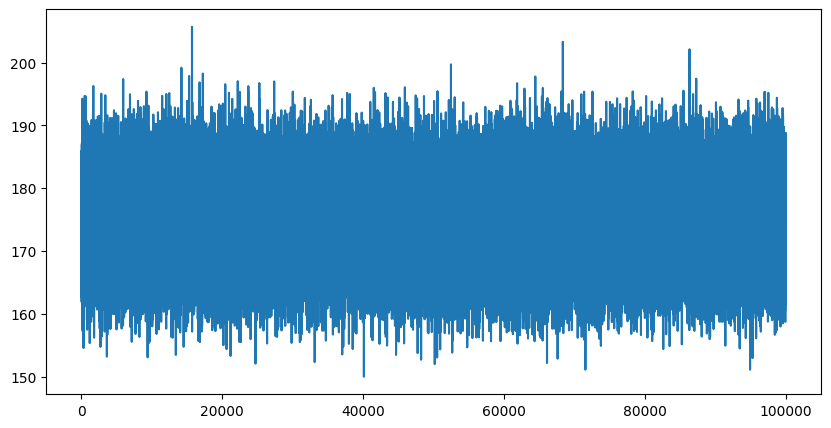

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data)

(array([4.9000e+01, 1.0230e+03, 7.3330e+03, 2.4179e+04, 3.5450e+04,
        2.3837e+04, 7.2010e+03, 8.7100e+02, 5.4000e+01, 3.0000e+00]),
 array([149.98599639, 155.55777399, 161.1295516 , 166.7013292 ,
        172.2731068 , 177.84488441, 183.41666201, 188.98843961,
        194.56021722, 200.13199482, 205.70377242]),
 <BarContainer object of 10 artists>)

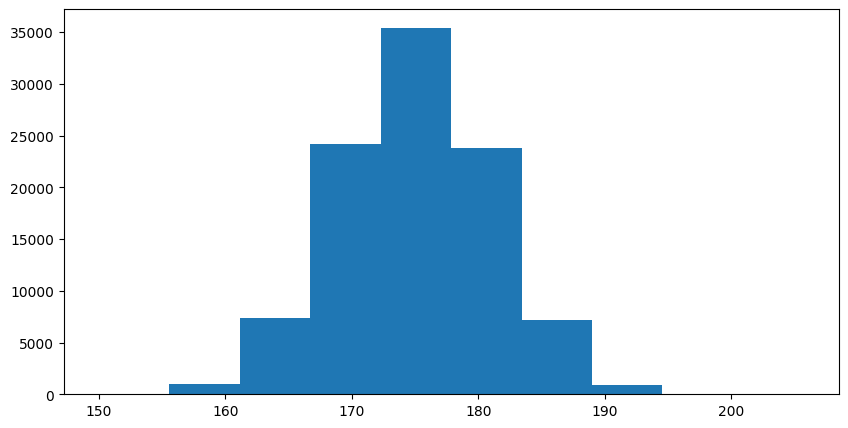

In [18]:

fig, ax = plt.subplots(figsize=(10,5))
plt.hist(data, bins=10)

(array([4.9000e+01, 1.0230e+03, 7.3330e+03, 2.4179e+04, 3.5450e+04,
        2.3837e+04, 7.2010e+03, 8.7100e+02, 5.4000e+01, 3.0000e+00]),
 array([-4.1690006, -3.240371 , -2.3117414, -1.3831118, -0.4544822,
         0.4741474,  1.402777 ,  2.3314066,  3.2600362,  4.1886658,
         5.1172954]),
 <BarContainer object of 10 artists>)

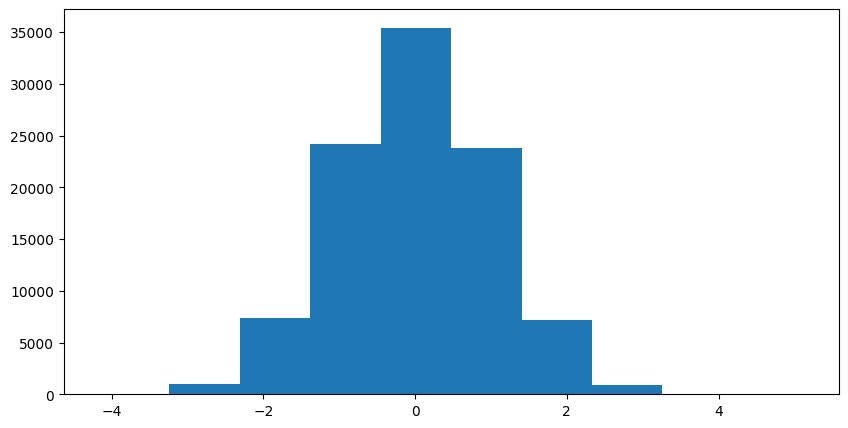

In [19]:
data_z = (data - mu)/sigma

fig, ax = plt.subplots(figsize=(10,5))
plt.hist(data_z, bins=10)

In [20]:
x = np.linspace(-3, 3, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-data_z**2) / 2.0)

Text(0, 0.5, 'Probability Density')

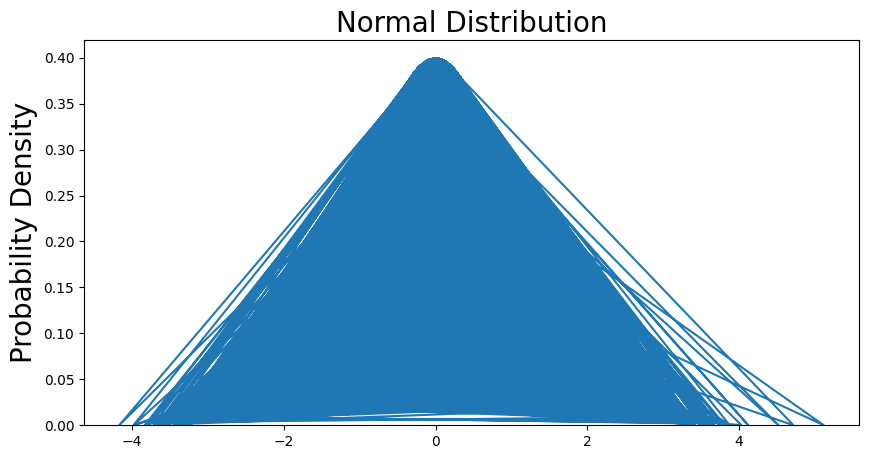

In [21]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(data_z, pdf_normal_distribution);
ax.set_ylim(0);

# Simulating Dice throws

In [27]:
np.random.uniform(low=1, high=7, size = 50)

array([6.00343171, 2.77542289, 3.82348868, 5.82752233, 6.94474569,
       1.06446378, 3.48616948, 6.75532827, 4.12579662, 4.32226148,
       2.31745058, 6.58056045, 1.68151951, 6.71539765, 1.17917934,
       1.10549421, 1.01952979, 4.11358786, 5.94521348, 1.3399027 ,
       1.58581782, 2.98703518, 2.29700128, 6.31650132, 3.15471891,
       5.97116119, 5.65829915, 3.6463178 , 6.91829665, 4.23304196,
       3.97097542, 2.85341746, 2.31085675, 4.83135535, 6.18424792,
       2.60724336, 6.32010006, 4.59304842, 6.39593088, 3.66457657,
       3.80936625, 3.23038842, 2.76538013, 5.48522762, 2.66639321,
       6.17367835, 4.52962079, 1.23641262, 1.594975  , 5.14026492])

In [25]:
def dice_throws(num_sample):
    int_throws = np.vectorize(int)
    throws = int_throws(np.random.uniform(low=1, high=7, size = num_sample))
    return throws

In [26]:
dice_throws(10)

array([4, 1, 2, 1, 3, 2, 6, 3, 6, 4])

In [29]:
def average_throws(num_throws = 10, num_experiment = 1000):
    averages = []
    for i in range(num_experiment):
        a = dice_throws(num_throws)
        av = a.mean()
        averages.append(av)
    return np.array(averages)

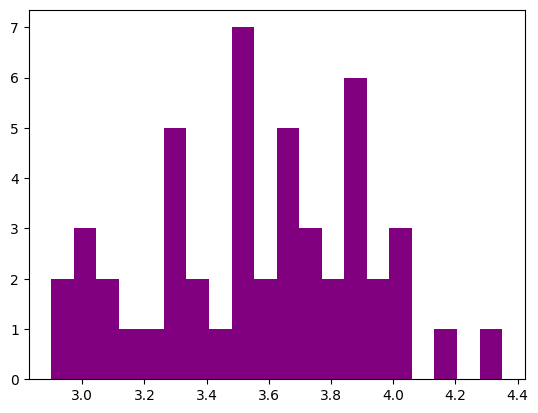

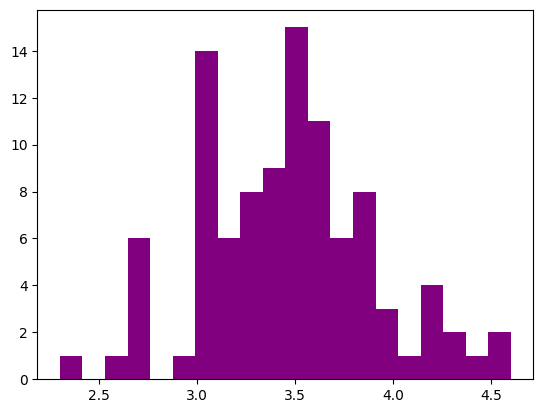

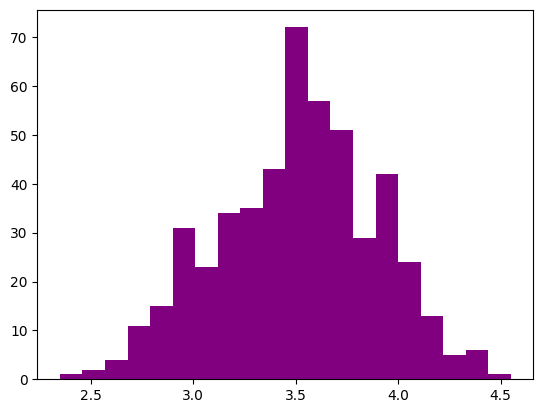

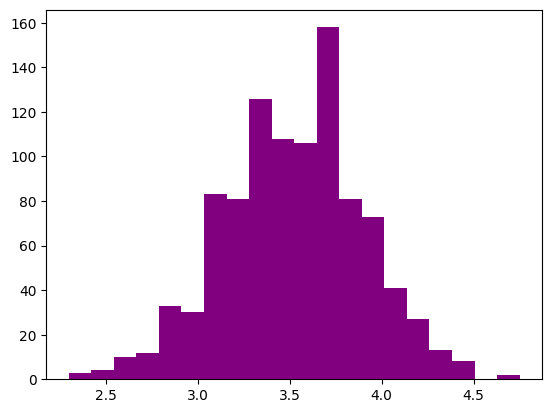

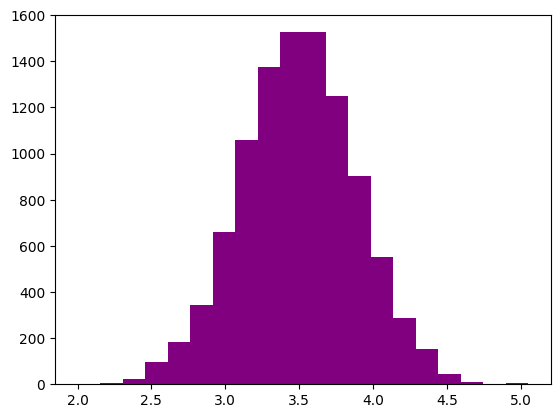

In [30]:
for i in [ 49, 99, 499, 999, 9999]:
    plt.hist(average_throws(num_throws=20, num_experiment=i), bins = 20, color='purple')
    plt.show()